# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# 2. Data

In [2]:
attributes = pd.read_csv('attributes.csv', index_col=0)

In [3]:
attributes.head()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
0,1001.0,153.40,2019.0,0.27760,0.04904,0.6656,0.14710,0.01587,0.2654,0.3001,...,25.38,0.11840,0.006399,0.1622,0.2419,0.03003,0.4601,10.38,0.9053,17.33
1,1326.0,74.08,1956.0,0.07864,0.01308,0.1866,0.07017,0.01340,0.1860,0.0869,...,24.99,0.08474,0.005225,0.1238,0.1812,0.01389,0.2750,17.77,0.7339,23.41
2,1203.0,94.03,1709.0,0.15990,0.04006,0.4245,0.12790,0.02058,0.2430,0.1974,...,23.57,0.10960,0.006150,0.1444,0.2069,0.02250,0.3613,21.25,0.7869,25.53
3,386.1,27.23,567.7,0.28390,0.07458,0.8663,0.10520,0.01867,0.2575,0.2414,...,14.91,0.14250,0.009110,0.2098,0.2597,0.05963,0.6638,20.38,1.1560,26.50
4,1297.0,94.44,1575.0,0.13280,0.02461,0.2050,0.10430,0.01885,0.1625,0.1980,...,22.54,0.10030,0.011490,0.1374,0.1809,0.01756,0.2364,14.34,0.7813,16.67


In [4]:
attributes.columns

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'diagnosis',
       'fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se',
       'texture_worst'],
      dtype='object')

In [5]:
clean_data = pd.read_csv('CleanData.csv', index_col = 0)

In [6]:
clean_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2.1 Feature Engineering

In [7]:
df = clean_data
encoded_data = pd.get_dummies(clean_data['diagnosis']).drop('M', axis = 1)
df.drop(['diagnosis'], axis=1, inplace = True)
data = pd.concat([df, encoded_data], axis = 1)

In [8]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
target = data[['B']]

In [10]:
attributes = data.drop('B', axis = 1)

## 2.2 Splitting Data into Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X = attributes
y = target
#training set = 75% testing set = 25%
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)

In [13]:
print(X_train.shape, y_train.shape)

(426, 30) (426,)


In [14]:
print(X_test.shape, y_test.shape)

(143, 30) (143,)


In [15]:
## should I split my data further into validation and training sets?

## 2.3 Scaling Data

In [16]:
# assuming data is normally distributed
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Imports for Evaluating Data

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_validate, learning_curve, validation_curve, RandomizedSearchCV, StratifiedKFold
from bayes_opt import BayesianOptimization
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest

# 4. Training

## 4.1 Dummy Classifier

In [18]:
from sklearn.dummy import DummyClassifier

In [19]:
model_dummy = DummyClassifier(random_state=10)
model_dummy.fit(X_train_scaled, y_train)
print('Classification Matrix: ', confusion_matrix(y_test, model_dummy.predict(X_test_scaled)))
print('Classification Report: ', classification_report(y_test, model_dummy.predict(X_test_scaled)))
print('MCC: ', matthews_corrcoef(y_test, model_dummy.predict(X_test)))

Classification Matrix:  [[ 0 52]
 [ 0 91]]
Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.64      1.00      0.78        91

    accuracy                           0.64       143
   macro avg       0.32      0.50      0.39       143
weighted avg       0.40      0.64      0.49       143

MCC:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

### 4.1.2 Comments
The dummy classifier gives an accuracy score of 63%. This is a baseline score to compare suitable models to. 

## 4.2 Logistic Regression

### 4.2.1 Logistic Regression
During EDA the different features were identified to vary significantly in scale. As a consequence the training and the testing set for this model will be scaled prior to fitting and prediticting. 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model_log = LogisticRegression(random_state = 10)
model_log.fit(X_train_scaled, y_train)
predictions_log = model_log.predict(X_test_scaled)

In [22]:
print(confusion_matrix(y_test, predictions_log))
print(classification_report(y_test, predictions_log))

[[50  2]
 [ 4 87]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.98      0.96      0.97        91

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



### 4.2.2 Hyperparameter Tuning

In [23]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#GridSearch can set off a lot of warnings that are not necessarily important 
import warnings
warnings.filterwarnings('ignore') 

parameters ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
model_log=LogisticRegression(random_state = 10)
model_log_grid=GridSearchCV(model_log,parameters,cv=10)
model_log_grid.fit(X_train_scaled,y_train)
predictions_logreg_grid = model_log_grid.predict(X_test_scaled)

print("Best parameters ",model_log_grid.best_params_)

Best parameters  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### 4.2.3 Logistic Regression with best parameters

In [24]:
model_log_best_params = LogisticRegression(random_state = 10, solver='liblinear', penalty='l2', C=0.1)
model_log_best_params.fit(X_train_scaled, y_train)
predictions_logBest = model_log_best_params.predict(X_test_scaled)
print('Confusion Matrix: \n',confusion_matrix(y_test,predictions_logBest))
print('Classification Report: \n', classification_report(y_test, predictions_logBest))
print('MCC: ', matthews_corrcoef(y_test, predictions_logBest))

Confusion Matrix: 
 [[51  1]
 [ 2 89]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

MCC:  0.9549644877199515


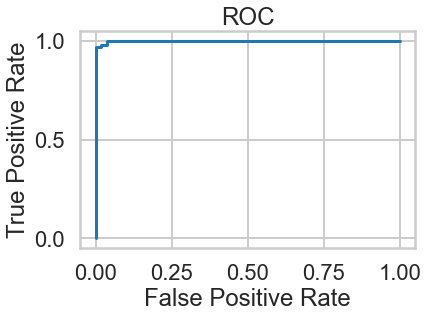

Area Under Curve:  0.9989433643279797


In [25]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
y_pred_prob = model_log_best_params.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area Under Curve: ',auc)

### 4.2.4 Conclusion
The logistic model, prior to tuning hyperparameters, proved to be a good model as it has a f1-score of 94% and 96% percent for benign and malignant tumours respectively. After hyperparametet tuning, this score was imporved to 97% and 98% respectively.

Problem: We do want our model to have a higher number of false positives compared to false negatives. Whilst the false negatives are only 1 higher than the false positives, it'll be interesting to see if we can futher improve upon this. 

## 4.3 KNN

### 4.3.1 KNN with n_neighbors = 1

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

[[47  5]
 [ 6 85]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.94      0.93      0.94        91

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



### 4.3.2 KNN with scaled data

In [30]:
model_knn_scaled = KNeighborsClassifier(n_neighbors=1)
model_knn_scaled.fit(X_train_scaled, y_train)
predictions_knn_scaled = model_knn_scaled.predict(X_test_scaled)

In [31]:
print(confusion_matrix(y_test, predictions_knn_scaled))
print(classification_report(y_test, predictions_knn_scaled))

[[51  1]
 [ 1 90]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.99      0.99      0.99        91

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



### 4.3.3 KNN - Determining best K

In [32]:
error_rate = []

for k in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_prediction = knn.predict(X_test)
    error_rate.append(np.mean(k_prediction != y_test))

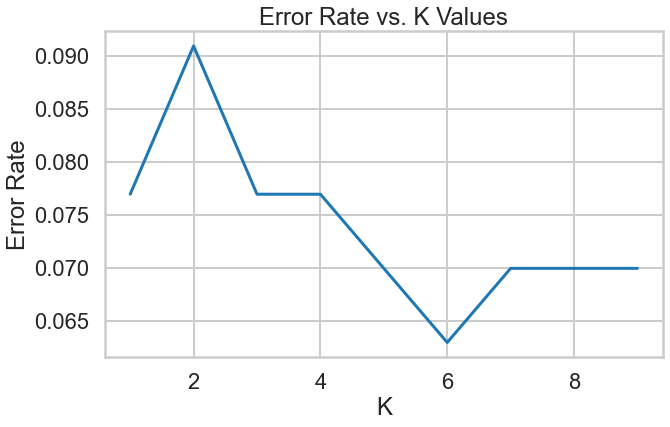

In [33]:
_ = plt.figure(figsize=(10,6))
_ = plt.plot(range(1,10),error_rate)
_ = plt.title('Error Rate vs. K Values')
_ = plt.xlabel('K')
_ = plt.ylabel('Error Rate')

### 4.3.4 KNN with n=2

In [34]:
knn_best_k = KNeighborsClassifier(n_neighbors=2)
knn_best_k.fit(X_train, y_train)
knn_best_k_predictions = knn_best_k.predict(X_test)
print(confusion_matrix(y_test, knn_best_k_predictions))
print(classification_report(y_test, knn_best_k_predictions))

[[48  4]
 [ 9 82]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.95      0.90      0.93        91

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



### 4.3.5 KNN with n=6

In [35]:
knn_best_k = KNeighborsClassifier(n_neighbors=6)
knn_best_k.fit(X_train, y_train)
knn_best_k_predictions = knn_best_k.predict(X_test)
print(confusion_matrix(y_test, knn_best_k_predictions))
print(classification_report(y_test, knn_best_k_predictions))

[[48  4]
 [ 5 86]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        52
           1       0.96      0.95      0.95        91

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### 4.3.6 KNN - Hyperparameters Tuning

In [36]:
#parameters for KNN
parameters = {'leaf_size':list(range(1,15)), 'n_neighbors':list(range(1,15)), 'p':[1,2]}
knn_best_param = KNeighborsClassifier()
knn_best_param_grid = GridSearchCV(knn_best_param, parameters, cv=10)
knn_best_param_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'p': [1, 2]})

In [37]:
print("Best parameters: ",knn_best_param_grid.best_params_)

Best parameters:  {'leaf_size': 1, 'n_neighbors': 3, 'p': 2}


### 4.3.7 KNearest Neighbor model with hypertuned parameters

In [38]:
knn_hypertuned = KNeighborsClassifier(n_neighbors=3, leaf_size = 1, p=2)
knn_hypertuned.fit(X_train_scaled, y_train)
predictions_knn_hypertuned = knn_hypertuned.predict(X_test_scaled)
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn_hypertuned))
print('Calssification Report: \n', classification_report(y_test, predictions_knn_hypertuned))
print('MCC: ', matthews_corrcoef(y_test, predictions_knn_hypertuned))

Confusion Matrix: 
 [[50  2]
 [ 0 91]]
Calssification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.98      1.00      0.99        91

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

MCC:  0.9699794920789632


In [39]:
knn_hypertuned = KNeighborsClassifier(n_neighbors=2, leaf_size = 1, p=2)
knn_hypertuned.fit(X_train_scaled, y_train)
predictions_knn_hypertuned = knn_hypertuned.predict(X_test_scaled)
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn_hypertuned))
print('Calssification Report: \n', classification_report(y_test, predictions_knn_hypertuned))
print('MCC: ', matthews_corrcoef(y_test, predictions_knn_hypertuned))

Confusion Matrix: 
 [[51  1]
 [ 2 89]]
Calssification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

MCC:  0.9549644877199515


In [40]:
knn_hypertuned = KNeighborsClassifier(n_neighbors=6, leaf_size = 1, p=2)
knn_hypertuned.fit(X_train_scaled, y_train)
predictions_knn_hypertuned = knn_hypertuned.predict(X_test_scaled)
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_knn_hypertuned))
print('Calssification Report: \n', classification_report(y_test, predictions_knn_hypertuned))
print('MCC: ', matthews_corrcoef(y_test, predictions_knn_hypertuned))

Confusion Matrix: 
 [[51  1]
 [ 0 91]]
Calssification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      1.00      0.99        91

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

MCC:  0.9849409604906144


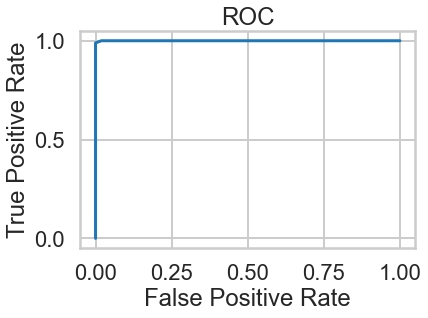

Area Under Curve:  0.9998943364327979


In [41]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
y_pred_prob = knn_hypertuned.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area Under Curve: ',auc)

### 4.3 Conclusion
The gridsearch proved that k=3 is the optimal value for k, however this contradicts the error-rate plot. When we use the hypertuned parameters for k=2, 3, and 6 we notice that k=3 and 6 gives us the higher accuracy score (99% compared to 98% for n=2), and both of them have a lower number of false nagatives than false positives. When comparing the MCC scores, the model with k=6 has the highest score which is why it can be concluded that KNN with k=6 is the best model so far. 



## 4.4 Support Vector Classifier

In [42]:
from sklearn.svm import SVC

### 4.4.1 Support Vector Classifier without scaling

In [43]:
model_svc = SVC(random_state = 10)
model_svc.fit(X_train, y_train)
predictions = model_svc.predict(X_test)

In [44]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[44  8]
 [ 3 88]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        52
           1       0.92      0.97      0.94        91

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



### 4.4.2 SVC with scaling of data

In [45]:
model_svc_scaled = SVC(random_state = 10)
model_svc_scaled.fit(X_train_scaled, y_train)
predictions_scaled = model_svc.predict(X_test_scaled)

In [46]:
print(confusion_matrix(y_test, predictions_scaled))
print(classification_report(y_test, predictions_scaled))
print(matthews_corrcoef(y_test, predictions_scaled))

[[ 0 52]
 [ 0 91]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.64      1.00      0.78        91

    accuracy                           0.64       143
   macro avg       0.32      0.50      0.39       143
weighted avg       0.40      0.64      0.49       143

0.0


### 4.4.3 Hyperparameters Tuning

In [47]:
X = attributes
y = target
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size = 0.25, random_state = 10)
parameters = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
predictions_grid_svc = grid.predict(X_test)
print('Best Parameters: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Best Parameters:  {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Estimator:  SVC(C=1, gamma=0.0001)


### 4.4.4 SVC with Optimal Parameters

In [49]:
model_svc = SVC(random_state = 10, C = 1, gamma = 0.0001, kernel = 'rbf', probability=True)
model_svc.fit(X_train, y_train)
predictions_SVC_hypertuned = model_svc.predict(X_test)

In [50]:
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_SVC_hypertuned))
print('Classification Report: \n',classification_report(y_test, predictions_SVC_hypertuned))
print('MCC: ', matthews_corrcoef(y_test, predictions_SVC_hypertuned))

Confusion Matrix: 
 [[47  5]
 [ 5 86]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.95      0.95      0.95        91

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

MCC:  0.8489010989010989


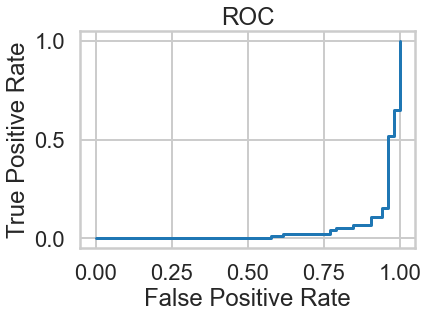

Area Under Curve:  0.04120879120879121


In [51]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
y_pred_prob = model_svc.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area Under Curve: ',auc)

### 4.4.5 Conclusion
Not as great as the KNN and Logistic Models. 

## 4.5 Random Forest Classifier

### 4.5.1 Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz

In [53]:
model_rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)
model_rfc.fit(X_train, y_train)
predictions_rfc = model_rfc.predict(X_test)

In [54]:
print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))
print(matthews_corrcoef(y_test, predictions_rfc))

[[51  1]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9549644877199515


### 4.5.2 Hyperparameters Tuning Through GridSearch

In [55]:
parameters = {'n_estimators':np.arange(1,50), 'max_depth': np.arange(1,10)}
model_rfc_grid = RandomForestClassifier(random_state = 10)
model_rfc_grid_cv = GridSearchCV(model_rfc_grid, parameters, cv=10)
model_rfc_grid_cv.fit(X_test, y_test)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [56]:
print(model_rfc_grid_cv.best_params_)

{'max_depth': 4, 'n_estimators': 23}


In [57]:
print(model_rfc_grid_cv.best_score_)

0.9576190476190476


### 4.5.3 Random Forest Model using hyperparameters from GridSearch

In [58]:
model_rfc_best = RandomForestClassifier(n_estimators = 23, max_depth=4, random_state = 10)
model_rfc_best.fit(X_train, y_train)
predictions_rfc_best = model_rfc_best.predict(X_test)

In [59]:
print(confusion_matrix(y_test, predictions_rfc_best))
print(classification_report(y_test, predictions_rfc_best))
print(matthews_corrcoef(y_test, predictions_rfc_best ))

[[50  2]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.98      0.98      0.98        91

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

0.9395604395604396


### 4.5.4 Bayesian Optimisation

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
def stratified_kfold_score(classifier,X, y, n_fold):
    X = X.values 
    y = y
    strat_kfold = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = 10)
    accuracy_list = []
    
    for train_index, test_index in strat_kfold.split(X,y):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        classifier.fit(x_train_fold, y_train_fold)
        predictions = classifier.predict(x_test_fold)
        accuracy_test = accuracy_score(predictions, y_test_fold)
        accuracy_list.append(accuracy_test)
    
    return np.array(accuracy_list).mean()

In [63]:
def bo_params_rfc(max_samples, n_estimators, max_features):
    parameters = {'max_samples': max_samples, 'max_features': max_features, 'n_estimators': int(n_estimators)}
    classifier = RandomForestClassifier(max_samples = parameters['max_samples'],
                                       n_estimators = parameters['n_estimators'],
                                       max_features= parameters['max_features'], 
                                       random_state = 10)
    score = stratified_kfold_score(classifier, X_train, y_train, n_fold = 5)
    return score

In [64]:
rf_bo = BayesianOptimization(bo_params_rfc, {'max_samples':(0.5,1), 
                                            'max_features': (0.5,1), 
                                            'n_estimators': (100,200)})

In [65]:
rf_bo.maximize(n_iter= 10, init_points = 20, acq = 'ei')

|   iter    |  target   | max_fe... | max_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.9578   |  0.8395   |  0.9186   |  123.5    |
|  2        |  0.9531   |  0.8539   |  0.9822   |  139.4    |
|  3        |  0.9531   |  0.5503   |  0.797    |  132.8    |
|  4        |  0.9483   |  0.9667   |  0.8777   |  175.0    |
|  5        |  0.9507   |  0.9699   |  0.6639   |  136.5    |
|  6        |  0.9507   |  0.808    |  0.5148   |  195.2    |
|  7        |  0.9531   |  0.8018   |  0.7353   |  166.7    |
|  8        |  0.9507   |  0.9679   |  0.8463   |  125.4    |
|  9        |  0.9531   |  0.6285   |  0.8727   |  163.3    |
|  10       |  0.9507   |  0.6009   |  0.9479   |  163.5    |
|  11       |  0.9578   |  0.5634   |  0.9818   |  178.8    |
|  12       |  0.9578   |  0.7448   |  0.6754   |  148.6    |
|  13       |  0.9578   |  0.5699   |  0.7042   |  121.7    |
|  14       |  0.9483   |  0.7943   |  0.9839   |  127.3    |
|  15   

In [66]:
best_parameters = rf_bo.max['params']
best_parameters['n_estimators']= int(best_parameters['n_estimators'])
print(best_parameters)

{'max_features': 0.8395009680557065, 'max_samples': 0.9186146896573795, 'n_estimators': 123}


In [67]:
baye_rfc = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                  random_state = 10, 
                                  max_samples = best_parameters['max_samples'], 
                                  max_features = best_parameters['max_features'])
baye_rfc.fit(X_train, y_train)
predictions_baye_rfc = baye_rfc.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions_baye_rfc))
print('Classification Report: \n', classification_report(y_test, predictions_baye_rfc))
print('MCC: ',matthews_corrcoef(y_test, predictions_baye_rfc ))

Confusion Matrix: 
 [[52  0]
 [ 2 89]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.98      0.99        91

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

MCC:  0.9704632614370013


### 4.5.5 Validation Curves

In [68]:
from yellowbrick.model_selection import validation_curve

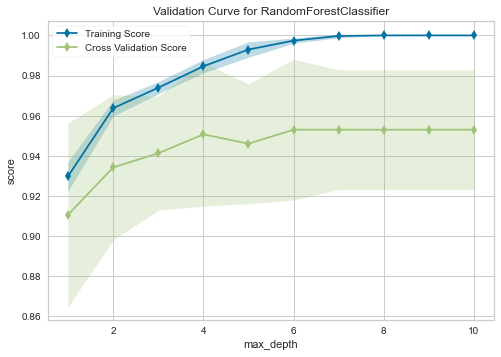

In [69]:
rfc_hypertuning =  RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                          random_state = 10, 
                                          max_samples = best_parameters['max_samples'], 
                                          max_features = best_parameters['max_features'],
                                         criterion = 'gini')
validation_curve = validation_curve(rfc_hypertuning, X = X_train, y= y_train,
                 param_name = 'max_depth',
                 n_jobs = -1,
                 param_range = np.arange(1,11),
                 cv = 10, 
                 scoring = 'accuracy'
                )

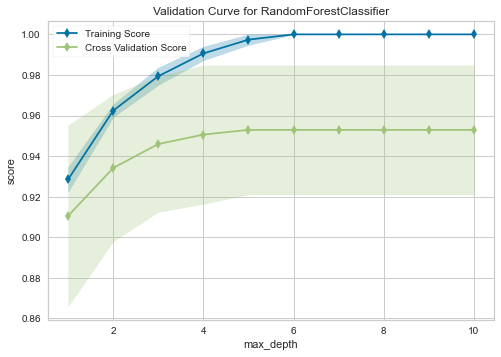

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=10,
                estimator=RandomForestClassifier(criterion='entropy',
                                                 max_features=0.8395009680557065,
                                                 max_samples=0.9186146896573795,
                                                 n_estimators=123,
                                                 random_state=10),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                scoring='accuracy')

In [70]:
from yellowbrick.model_selection import validation_curve
rfc_hypertuning =  RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                  random_state = 10, 
                                  max_samples = best_parameters['max_samples'], 
                                  max_features = best_parameters['max_features'], criterion = 'entropy')
validation_curve(rfc_hypertuning, X_train, y_train,param_name = 'max_depth',n_jobs = -1,
                 param_range = np.arange(1,11),cv = 10,scoring = 'accuracy')

## 4.6 Gradient Boosting Regression

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

### 4.6.1

In [72]:
model_gb = GradientBoostingClassifier(random_state = 10)
model_gb.fit(X_train, y_train)
predictions_gb = model_gb.predict(X_test)

In [73]:
print(confusion_matrix(y_test, predictions_gb))
print(classification_report(y_test, predictions_gb))
print(matthews_corrcoef(y_test, predictions_gb))

[[50  2]
 [ 3 88]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.98      0.97      0.97        91

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

0.9248653204852252


### 4.6.2 Hyperparameters Tuning

In [74]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
parameters = {'learning_rate': sp_randFloat(), 
             'subsample': sp_randFloat(),
             'n_estimators': sp_randInt(100,1000),
             'max_depth': sp_randInt(4,10)}

In [75]:
model_gb_cv = RandomizedSearchCV(GradientBoostingClassifier(random_state=10),
                                 parameters,
                                 random_state = 10, 
                                 cv=10, 
                                 n_iter=10, 
                                 n_jobs=-1)

In [76]:
model_gb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=10),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E473787A30>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E4737788B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E4737878B0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E473778550>},
                   random_state=10)

In [77]:
predictions = model_gb_cv.predict(X_test)

In [78]:
print(model_gb_cv.best_estimator_)
print(model_gb_cv.best_params_)
print(model_gb_cv.best_score_)

GradientBoostingClassifier(learning_rate=0.08833981417401027, max_depth=8,
                           n_estimators=471, random_state=10,
                           subsample=0.9533933461949365)
{'learning_rate': 0.08833981417401027, 'max_depth': 8, 'n_estimators': 471, 'subsample': 0.9533933461949365}
0.9552602436323367


### 4.6.3 Gradient Boosting with Optimal Parameteters

In [79]:
model_gb_best = GradientBoostingClassifier(learning_rate = 0.088,
                                           max_depth = 8, 
                                           n_estimators = 471,
                                           subsample = 0.9533,
                                           random_state = 10)
model_gb_best.fit(X_train, y_train)
predictions_gbBest = model_gb_best.predict(X_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_gbBest))
print('Classification Report: \n', classification_report(y_test, predictions_gbBest))
print('MCC: ', matthews_corrcoef(y_test, predictions_gbBest))

Confusion Matrix: 
 [[52  0]
 [ 3 88]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.97      0.98        91

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

MCC:  0.9561828874675148


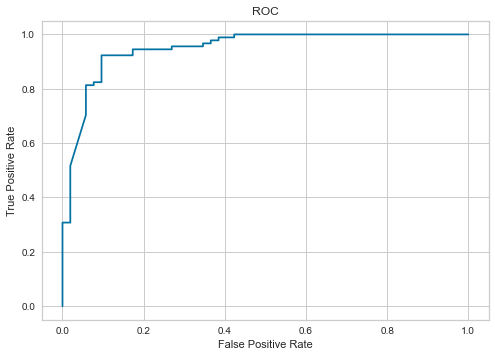

Area Under Curve:  0.948647506339814


In [80]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
y_pred_prob = model_gb_best.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area Under Curve: ',auc)

In [81]:
##https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-lear
##why are they scaling?

### Conclusion

## 4.7 XGBoost Classifier

## 4.7.1

In [82]:
from xgboost import XGBClassifier

In [83]:
model_xgb = XGBClassifier(random_state = 10)
model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test)

[15:30:55] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
print(confusion_matrix(y_test, predictions_xgb))
print(classification_report(y_test, predictions_xgb))
print(matthews_corrcoef(y_test, predictions_xgb))

[[51  1]
 [ 2 89]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.99      0.98      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9549644877199515


### 4.7.2 Hyperparameter Tuning

In [85]:
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}
model_xgb_cv =RandomizedSearchCV(XGBClassifier(random_state=10),
                                 parameters,
                                 cv=10, 
                                 n_jobs=-1)
model_xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [86]:
print(model_xgb_cv.best_estimator_)
print('\n')
print(model_xgb_cv.best_params_)
print('\n')
print(model_xgb_cv.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=20, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1,
              objective='reg:squarederror', predictor='auto', random_state=10,
              reg_alpha=0.2, reg_lambda=2, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


{'reg_lambda': 2, 'reg_alpha': 0.2, 'objective': 'reg:squarederror', 'n_estimators': 300, 'min_child_weight': 20, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.9, 'booster': 'gbtree'}


0.9436323366555925


### 4.7.2 XGBoost with Optimal Parameters

In [87]:
model_xgb_best = XGBClassifier(random_state = 10, reg_lambda= 3, reg_alpha = 0.5, objective = 'reg:squarederror',
                               n_estimators= 500, min_child_weight= 15, max_depth= 10, 
                               learning_rate = 0.1, gamma = 3, colsample_bytree= 0.8, 
                               booster = 'gbtree')
model_xgb_best.fit(X_train, y_train)
predictions_xgb_best = model_xgb_best.predict(X_test)
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions_xgb_best))
print('Classification Report: \n',classification_report(y_test, predictions_xgb_best))
print('MCC: ',matthews_corrcoef(y_test, predictions_xgb_best))

Confusion Matrix: 
 [[47  5]
 [ 2 89]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.95      0.98      0.96        91

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

MCC:  0.8938487762961772


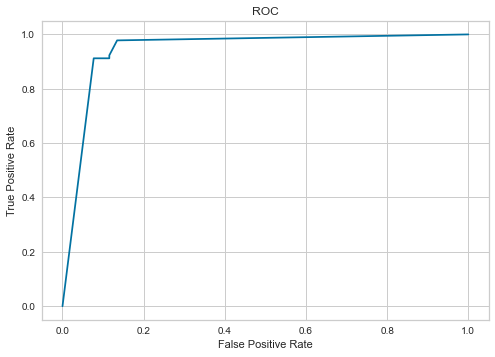

Area Under Curve:  0.9443153000845309


In [88]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
y_pred_prob = model_xgb_best.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area Under Curve: ',auc)

### Conclusions

# Conclusions

Best Model: KNN with n=6 

##### https://www.kaggle.com/neerajmohan/randomforest-model-with-bayesian-optimization
##### https://towardsdatascience.com/validation-curve-explained-plot-the-influence-of-a-single-hyperparameter-1ac4864deaf8